# Домашнее задание

1. Задание.
    - Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев при разных значениях шага градиента и для разной глубины деревьев. 
    - Сделать выводы о зависимости ошибки от этих гиперпараметров (шаг градиента, максимальная глубина деревьев, количество деревьев). 
    - Подобрать оптимальные значения этих гиперпараметров (минимум ошибки на тесте при отсутствии переобучения).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection

from sklearn.tree import DecisionTreeRegressor

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def bias(y, z):
    return (y - z)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    trees = []
    train_errors = []
    test_errors = []    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)
            tree.fit(X_train, bias(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        trees.append(tree)
    return trees, train_errors, test_errors

Базовый вариант:

количество деревьев = 10, глубина = 3, шаг градиента = 1

In [9]:
n_trees = 10
coefs = [1] * n_trees
max_depth = 3
eta = 1
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [10]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [11]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1116.2774910404833
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 6027.177305586609


In [12]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

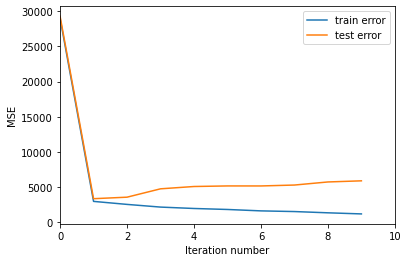

In [13]:
get_error_plot(n_trees, train_errors, test_errors)

Варианты, показавшие удовлетворительные результаты:

1) количество деревьев = 20, глубина = 2, шаг градиента = 0.1

In [71]:
n_trees = 20
coefs = [1] * n_trees
max_depth = 2
eta = 0.1
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [72]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 20 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 3165.709018984393
Ошибка алгоритма из 20 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 3219.9570836622934


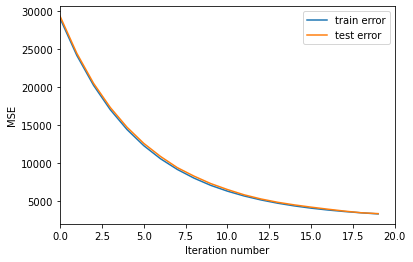

In [73]:
get_error_plot(n_trees, train_errors, test_errors)

2) количество деревьев = 30, глубина = 2, шаг градиента = 0.1

In [86]:
n_trees = 30
coefs = [1] * n_trees
max_depth = 2
eta = 0.1
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [87]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 2599.035417467763
Ошибка алгоритма из 30 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 2683.264933865624


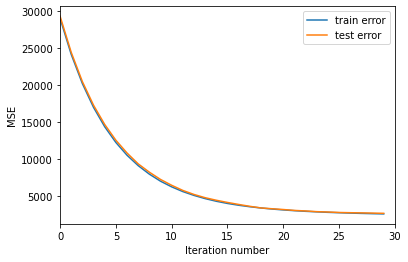

In [88]:
get_error_plot(n_trees, train_errors, test_errors)

3) количество деревьев = 50, глубина = 2, шаг градиента = 0.1

In [47]:
n_trees = 50
coefs = [1] * n_trees
max_depth = 2
eta = 0.1
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [48]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 50 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 2231.392760968192
Ошибка алгоритма из 50 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 2555.678827437068


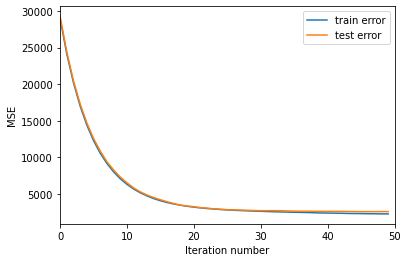

In [49]:
get_error_plot(n_trees, train_errors, test_errors)

4) количество деревьев = 100, глубина = 2, шаг градиента = 0.01

In [95]:
n_trees = 100
coefs = [1] * n_trees
max_depth = 2
eta = 0.01
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [96]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 100 деревьев глубиной 2     с шагом 0.01 на тренировочной выборке: 6604.41168552856
Ошибка алгоритма из 100 деревьев глубиной 2     с шагом 0.01 на тестовой выборке: 6835.091912661129


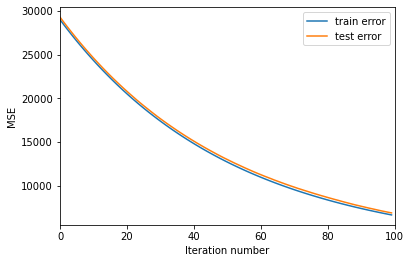

In [97]:
get_error_plot(n_trees, train_errors, test_errors)

Основываясь на полученных результатах, можно сделать следующий вывод:
- независимо от количества деревьев (20, 30, 50), алгоритм сходится при меньшем значении глубины деревьев (2) и значении шага градиента, равном 1e-1;
- при увеличении количества деревьев до 100 шаг градиента пришлось уменьшить до 1e-2, при этом глубина деревьев осталась прежней (2).     